<a href="https://colab.research.google.com/github/bryantanwz/toy-projects/blob/main/ViT_Cancer_Diagnoser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Is it colorectal cancer?


## Set up

In [1]:
from fastai.vision.all import *
from transformers import ViTFeatureExtractor, ViTForImageClassification
from huggingface_hub import hf_hub_download
import torch

## Data Loading

### For now, Use Kaggle Dataset

In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verify that the kaggle API is installed
!pip install -q kaggle
!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                                  title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
berkayalan/paris-2024-olympics-medals                                Paris 2024 Olympics Medals                           1KB  2024-08-14 11:02:45           4382         80  1.0              
haseebindata/student-performance-predictions                         Student Performance Predictions                      9KB  2024-08-17 06:57:57           4528         97  0.9411765        
willianoliveiragibin/olympics-2024                                   Olympics 2024                                      352KB  2024-08-15 22:29:31           2050         34  1.0              
balaji

In [3]:
!kaggle datasets download -d kmader/colorectal-histology-mnist

# Unzip the dataset
!unzip colorectal-histology-mnist.zip "Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/*" -d colorectal_histology_mnist/

Streaming output truncated to the last 5000 lines.
  inflating: colorectal_histology_mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/10009_CRC-Prim-HE-03_009.tif_Row_301_Col_151.tif  
  inflating: colorectal_histology_mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/10062_CRC-Prim-HE-02_003b.tif_Row_1_Col_301.tif  
  inflating: colorectal_histology_mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/100B0_CRC-Prim-HE-09_009.tif_Row_1_Col_301.tif  
  inflating: colorectal_histology_mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/10104_CRC-Prim-HE-10_021.tif_Row_451_Col_1.tif  
  inflating: colorectal_histology_mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/10142_CRC-Prim-HE-09_025.tif_Row_151_Col_151.tif  
  inflating: colorectal_histology_mnist/Kather_texture_2016_image_tiles_5000/Kather_

In [4]:
import os
import shutil
from pathlib import Path
import random

# Define the source and target paths
source_path = Path("colorectal_histology_mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000")
target_path = Path("small_histology_dataset_clean")

# Ensure the target path exists
target_path.mkdir(parents=True, exist_ok=True)

# Set seed for reproducibility
random.seed(42)

# Loop through each subfolder in the source directory
for subfolder in source_path.iterdir():
    if subfolder.is_dir():
        # List all image files in the current subfolder
        images = list(subfolder.glob("*.tif"))
        # Shuffle and select 100 images
        selected_images = random.sample(images, min(100, len(images)))
        # Create corresponding subfolder in the target directory
        target_subfolder = target_path/subfolder.name
        target_subfolder.mkdir(parents=True, exist_ok=True)
        # Copy selected images to the new subfolder
        for img in selected_images:
            shutil.copy(img, target_subfolder)

print("Small subset created successfully.")

Small subset created successfully.


In [5]:
# Check if the target directory exists
if target_path.exists():
    print(f"Inspecting the target directory: {target_path}")
    # Loop through each subfolder in the target directory
    for subfolder in target_path.iterdir():
        if subfolder.is_dir():
            # Count the number of images in the current subfolder
            num_images = len(list(subfolder.glob("*.tif")))
            print(f"Subfolder: {subfolder.name}, Number of images: {num_images}")
else:
    print(f"The directory {target_path} does not exist.")

Inspecting the target directory: small_histology_dataset_clean
Subfolder: 01_TUMOR, Number of images: 100
Subfolder: 08_EMPTY, Number of images: 100
Subfolder: 02_STROMA, Number of images: 100
Subfolder: 03_COMPLEX, Number of images: 100
Subfolder: 07_ADIPOSE, Number of images: 100
Subfolder: 05_DEBRIS, Number of images: 100
Subfolder: 06_MUCOSA, Number of images: 100
Subfolder: 04_LYMPHO, Number of images: 100


In [6]:
#Inspect path

path_to_inspect = Path("small_histology_dataset_clean")
# Check if the directory exists
if path_to_inspect.exists():
    # List all files and directories in the specified path
    files_in_directory = list(path_to_inspect.glob("**/*"))  # Glob pattern to include all files recursively
    # Print the files and directories
    if files_in_directory:
        print(f"Files in {path_to_inspect}:")
        for file in files_in_directory:
            print(file)
    else:
        print(f"The directory {path_to_inspect} is empty.")
else:
    print(f"The directory {path_to_inspect} does not exist.")

num_images1 = len(list(("small_histology_dataset_clean/*.tif")))
print(f"Number of images: {num_images1}")

Files in small_histology_dataset_clean:
small_histology_dataset_clean/01_TUMOR
small_histology_dataset_clean/08_EMPTY
small_histology_dataset_clean/02_STROMA
small_histology_dataset_clean/03_COMPLEX
small_histology_dataset_clean/07_ADIPOSE
small_histology_dataset_clean/05_DEBRIS
small_histology_dataset_clean/06_MUCOSA
small_histology_dataset_clean/04_LYMPHO
small_histology_dataset_clean/01_TUMOR/1243F_CRC-Prim-HE-05_007.tif_Row_1_Col_1.tif
small_histology_dataset_clean/01_TUMOR/12685_CRC-Prim-HE-07_022.tif_Row_1201_Col_151.tif
small_histology_dataset_clean/01_TUMOR/9D38_CRC-Prim-HE-09_009.tif_Row_151_Col_301.tif
small_histology_dataset_clean/01_TUMOR/16698_CRC-Prim-HE-07_025.tif_Row_1651_Col_601.tif
small_histology_dataset_clean/01_TUMOR/7372_CRC-Prim-HE-06_016.tif_Row_1_Col_601.tif
small_histology_dataset_clean/01_TUMOR/1757D_CRC-Prim-HE-09_012.tif_Row_1_Col_1.tif
small_histology_dataset_clean/01_TUMOR/17F3A_CRC-Prim-HE-10_021.tif_Row_301_Col_1.tif
small_histology_dataset_clean/01_TUM

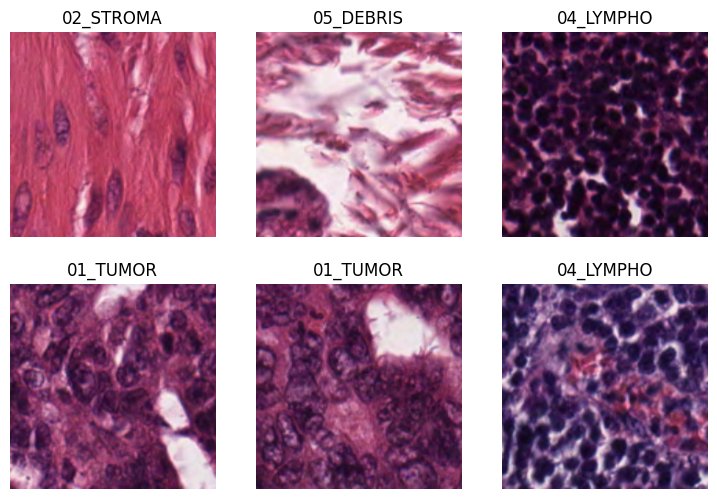

In [13]:
path = "small_histology_dataset_clean"
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [12]:
# Download the pre-trained ViT model from Huggingface
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224', num_labels=dls.c, ignore_mismatched_sizes=True)

# Integrate the model with fastai
#learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
#learn.model.forward = lambda x: learn.model(x).logits
#learn.fine_tune(5, base_lr=1e-3)
# GPU learning line
#learn.to_fp16()


# Define a custom head that extracts logits and flattens them
class ViTHead(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return x.logits
# Add the custom head to the model
model = nn.Sequential(model, ViTHead())
#or model = ViTForImageClassification

# Integrate the modified model with fastai
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

learn.fine_tune(5, base_lr=1e-3)

Exception ignored in: <function _xla_gc_callback at 0x7f86deffa5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# Train the model using one cycle policy
learn.fit_one_cycle(5, 1e-3)

In [ ]:
# Evaluate the model on the validation set
learn.show_results()

# Print classification report
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

# Plot confusion matrix
interp.plot_confusion_matrix(figsize=(10, 10), dpi=80)